<a href="https://colab.research.google.com/github/navi004/Deep-Learning-CSE4037-/blob/main/DL_Lab8_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attention Mechanism Lab - 8

* Naveen Nidadavolu
* 22MIA1049



# LSTM with Attention

Implementing LSTM with Attention

* Attention finds out important features using LSTM (or GRU). Attention cannot be use independently.

## import libraries

In [30]:
import tensorflow as tf

from tensorflow.keras.datasets import imdb

from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Embedding, LSTM, Dense, Activation, Layer

import numpy as np

## Load dataset

In [31]:
vocab_size = 1000
max_len = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = vocab_size)

In [32]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189,

## Padding sequences

In [33]:
x_train = pad_sequences(x_train, maxlen = max_len, padding = 'post')
x_test = pad_sequences(x_test, maxlen = max_len, padding = 'post')

In [34]:
x_train.shape

(25000, 200)

In [35]:
x_train

array([[  5,  25, 100, ...,  19, 178,  32],
       [  1, 194,   2, ...,   0,   0,   0],
       [  1,  14,  47, ...,   0,   0,   0],
       ...,
       [  1,  11,   6, ...,   0,   0,   0],
       [  1,   2,   2, ...,   0,   0,   0],
       [  1,  17,   6, ...,   0,   0,   0]], dtype=int32)

## Define input layer

In [36]:
input_layer = tf.keras.layers.Input(shape = (max_len,))

## Embedding layer
* An **embedding layer** is a type of neural network layer that transforms categorical data, such as words, into dense vector representations. This helps models capture semantic relationships and improves their ability to understand context in tasks like natural language processing.

In [37]:
embedding = Embedding(input_dim = vocab_size, output_dim = 256, input_length = max_len)(input_layer)

## LSTM layer

In [38]:
lstm_output = LSTM(64, return_sequences = True)(embedding)

## Attention layer
* An **attention layer** is a component in neural networks that dynamically focuses on different parts of the input, assigning weights based on their relevance. This allows the model to capture important information and improve performance in tasks like natural language processing. In the provided code, it calculates attention scores and creates a context vector from the input sequences.

In [39]:
class AttentionLayer(Layer):
  def __init__(self, **kwargs):
    super(AttentionLayer, self).__init__(**kwargs)

    self.w = tf.keras.layers.Dense(32, activation = 'tanh')
    self.v = tf.keras.layers.Dense(1, activation = None)

  def call(self, lstm_output):
    w = self.w(lstm_output)
    v = self.v(w)

    attention_scores = tf.nn.softmax(v, axis = 1)
    context_vector = tf.reduce_sum(attention_scores*lstm_output, axis = 1)

    return context_vector

## Context Vector
* A **context vector** is a summarized representation of input data that captures important information based on attention weights. It allows neural networks to focus on relevant features, improving performance in tasks like translation and summarization.

In [40]:
context_vector = AttentionLayer()(lstm_output)

## Fully connected layer

In [41]:
output = tf.keras.layers.Dense(1, activation = 'sigmoid')(context_vector)

## Model compilation
set loss and objective funtion

In [42]:
model = tf.keras.Model(inputs = input_layer, outputs = output)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Model Training

In [43]:
model.fit(x_train,y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test,y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6805 - loss: 0.5651 - val_accuracy: 0.8441 - val_loss: 0.3497
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8549 - loss: 0.3364 - val_accuracy: 0.8620 - val_loss: 0.3182
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8725 - loss: 0.2999 - val_accuracy: 0.8681 - val_loss: 0.3050
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8814 - loss: 0.2862 - val_accuracy: 0.8714 - val_loss: 0.2977
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8903 - loss: 0.2667 - val_accuracy: 0.8736 - val_loss: 0.3011
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8966 - loss: 0.2502 - val_accuracy: 0.8718 - val_loss: 0.3015
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9042 - loss: 0.2370 - val_accuracy: 0.8736 - val_loss: 0.3003
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9112 - loss: 0.2254 - val_accu

## Testing

In [44]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8616 - loss: 0.3457
Test Loss: 0.33581817150115967
Test Accuracy: 0.8641200065612793


In [45]:
lstm_metrics = (test_loss,test_acc)

# GRU with Attention


Implementing GRU with Attention


In [48]:
from tensorflow.keras.layers import GRU

## Model

In [49]:
input_layer = tf.keras.layers.Input(shape = (max_len,))
embedding = Embedding(input_dim = vocab_size, output_dim = 256, input_length = max_len)(input_layer)
GRU_output = GRU(64, return_sequences = True)(embedding)
context_vector = AttentionLayer()(GRU_output)
output = tf.keras.layers.Dense(1, activation = 'sigmoid')(context_vector)

## Model compilation

In [50]:
model = tf.keras.Model(inputs = input_layer, outputs = output)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Model training

In [51]:
model.fit(x_train,y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test,y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.6847 - loss: 0.5548 - val_accuracy: 0.8627 - val_loss: 0.3203
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8702 - loss: 0.3085 - val_accuracy: 0.8573 - val_loss: 0.3257
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8791 - loss: 0.2914 - val_accuracy: 0.8718 - val_loss: 0.3012
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8852 - loss: 0.2751 - val_accuracy: 0.8728 - val_loss: 0.2988
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8930 - loss: 0.2626 - val_accuracy: 0.8732 - val_loss: 0.2994
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9005 - loss: 0.2476 - val_accuracy: 0.8733 - val_loss: 0.2995
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9090 - loss: 0.2300 - val_accuracy: 0.8602 - val_loss: 0.3230
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9098 - loss: 0.2284 - val_accu

## Testing

In [52]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8652 - loss: 0.3362
Test Loss: 0.3285931646823883
Test Accuracy: 0.8663600087165833


In [53]:
gru_metrics = (test_loss,test_acc)

# BiLSTM with Attention

In [54]:
from tensorflow.keras.layers import Bidirectional

## Model

In [55]:
input_layer = tf.keras.layers.Input(shape=(max_len,))
embedding = Embedding(input_dim=vocab_size, output_dim=256, input_length=max_len)(input_layer)
# Using Bidirectional LSTM
bilstm_output = Bidirectional(LSTM(64, return_sequences=True))(embedding)
context_vector = AttentionLayer()(bilstm_output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(context_vector)

## Model compilation

In [56]:
model = tf.keras.Model(inputs = input_layer, outputs = output)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Training

In [57]:
model.fit(x_train,y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test,y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.6949 - loss: 0.5502 - val_accuracy: 0.8581 - val_loss: 0.3276
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.8636 - loss: 0.3219 - val_accuracy: 0.8650 - val_loss: 0.3111
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.8726 - loss: 0.3018 - val_accuracy: 0.8702 - val_loss: 0.3020
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8896 - loss: 0.2673 - val_accuracy: 0.8737 - val_loss: 0.2918
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8967 - loss: 0.2481 - val_accuracy: 0.8763 - val_loss: 0.2950
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9086 - loss: 0.2261 - val_accuracy: 0.8683 - val_loss: 0.3110
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9108 - loss: 0.2163 - val_accuracy: 0.8663 - val_loss: 0.3227
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - accuracy: 0.9205 - loss: 0.1979 - val_

## Testing

In [59]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8636 - loss: 0.3621
Test Loss: 0.3527039587497711
Test Accuracy: 0.8670399785041809


In [60]:
bilstm_metrics = (test_loss,test_acc)

## BiGRU with Attention

## Model

In [61]:
input_layer = tf.keras.layers.Input(shape=(max_len,))
embedding = Embedding(input_dim=vocab_size, output_dim=256, input_length=max_len)(input_layer)
# Using Bidirectional GRU
bigru_output = Bidirectional(GRU(64, return_sequences=True))(embedding)
context_vector = AttentionLayer()(bigru_output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(context_vector)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## Model compilation

In [62]:
model = tf.keras.Model(inputs = input_layer, outputs = output)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## Training

In [63]:
model.fit(x_train,y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test,y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.6944 - loss: 0.5435 - val_accuracy: 0.8624 - val_loss: 0.3187
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.8687 - loss: 0.3110 - val_accuracy: 0.8694 - val_loss: 0.3041
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8843 - loss: 0.2785 - val_accuracy: 0.8753 - val_loss: 0.2932
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.8917 - loss: 0.2618 - val_accuracy: 0.8756 - val_loss: 0.2919
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.8995 - loss: 0.2414 - val_accuracy: 0.8732 - val_loss: 0.3008
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.9061 - loss: 0.2343 - val_accuracy: 0.8753 - val_loss: 0.3014
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.9147 - loss: 0.2170 - val_accuracy: 0.8718 - val_loss: 0.3078
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9161 - loss: 0.2109 - val_

## Testing

In [64]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8622 - loss: 0.3509
Test Loss: 0.345747709274292
Test Accuracy: 0.864359974861145


In [65]:
bigru_metrics = (test_loss,test_acc)

# Comparison of Metrics of Attention with different Models

In [66]:
metrics = {"LSTM": lstm_metrics,
           "GRU": gru_metrics,
           "BiLSTM": bilstm_metrics,
           "BiGRU": bigru_metrics}

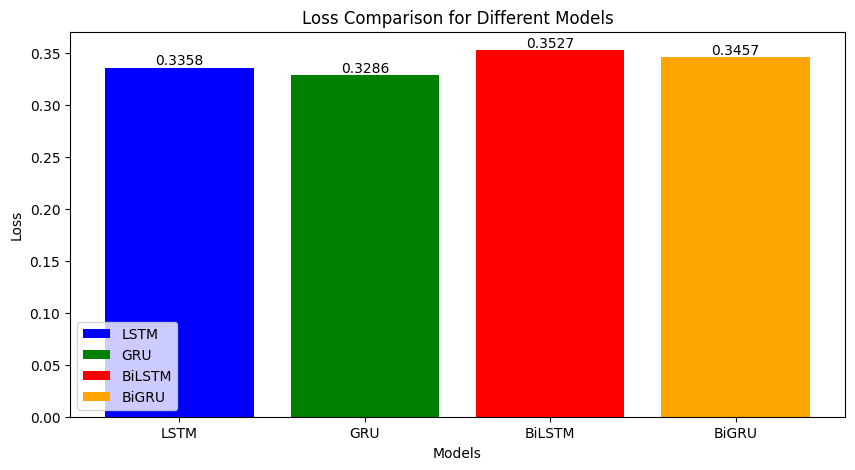

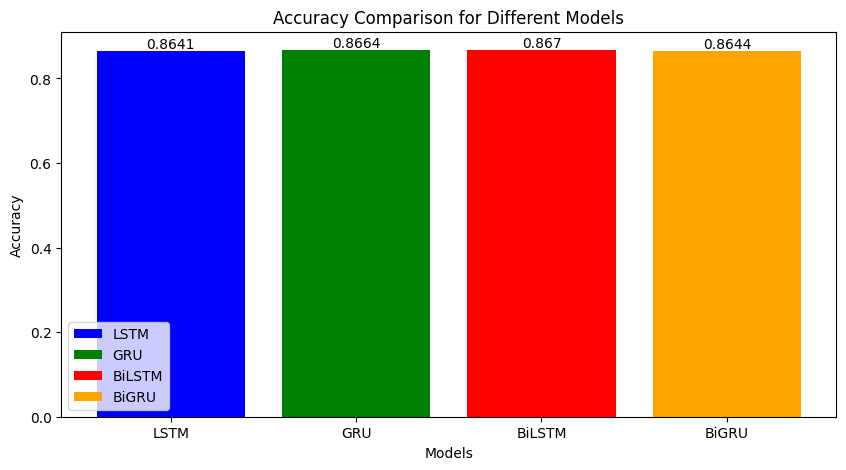

In [70]:
# prompt: i want different colors for each model

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Activation, Layer
import numpy as np
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# # Comparison of Metrics of Attention with different Models
metrics = {"LSTM": lstm_metrics,
           "GRU": gru_metrics,
           "BiLSTM": bilstm_metrics,
           "BiGRU": bigru_metrics}

model_names = list(metrics.keys())
loss_values = [m[0] for m in metrics.values()]
accuracy_values = [m[1] for m in metrics.values()]

colors = ['blue', 'green', 'red', 'orange']  # Define colors for each model

# Create bar plot for loss
plt.figure(figsize=(10, 5))
for i, model_name in enumerate(model_names):
  plt.bar(model_name, loss_values[i], color=colors[i], label=model_name)
plt.xlabel("Models")
plt.ylabel("Loss")
plt.title("Loss Comparison for Different Models")

# Annotate bars with loss values
for i, v in enumerate(loss_values):
  plt.text(i, v, str(round(v, 4)), ha='center', va='bottom')

plt.legend()
plt.show()

# Create bar plot for accuracy
plt.figure(figsize=(10, 5))
for i, model_name in enumerate(model_names):
  plt.bar(model_name, accuracy_values[i], color=colors[i], label=model_name)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison for Different Models")

# Annotate bars with accuracy values
for i, v in enumerate(accuracy_values):
  plt.text(i, v, str(round(v, 4)), ha='center', va='bottom')

plt.legend()
plt.show()


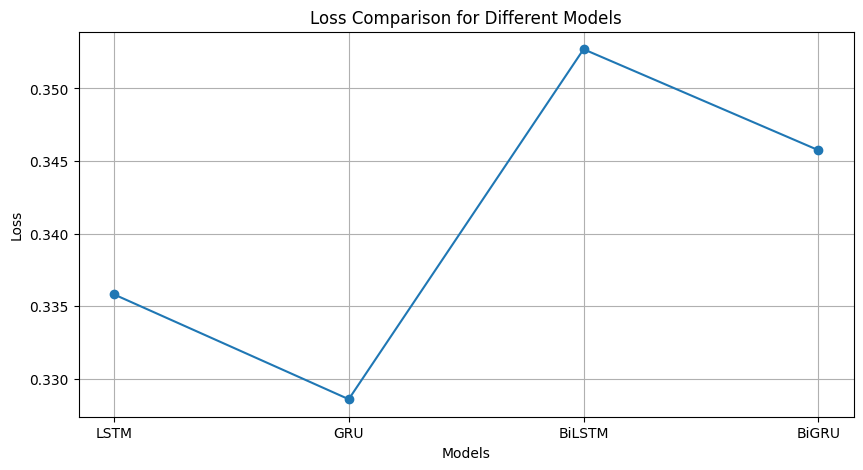

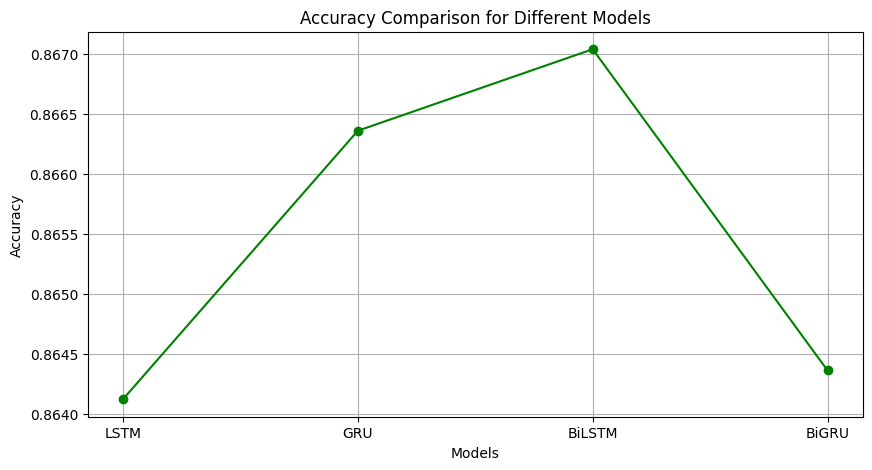

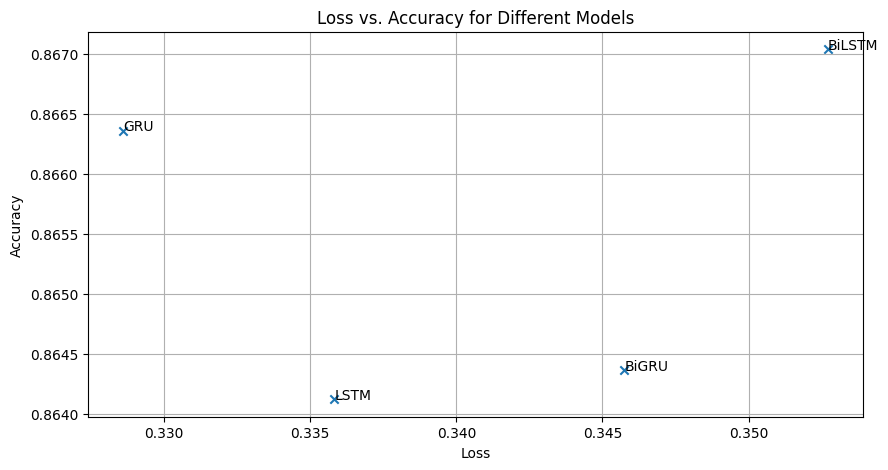

In [72]:
# # Comparison of Metrics of Attention with different Models
metrics = {"LSTM": lstm_metrics,
           "GRU": gru_metrics,
           "BiLSTM": bilstm_metrics,
           "BiGRU": bigru_metrics}

model_names = list(metrics.keys())
loss_values = [m[0] for m in metrics.values()]
accuracy_values = [m[1] for m in metrics.values()]

# Create a line plot for loss
plt.figure(figsize=(10, 5))
plt.plot(model_names, loss_values, marker='o')
plt.xlabel("Models")
plt.ylabel("Loss")
plt.title("Loss Comparison for Different Models")
plt.grid(True)
plt.show()


# Create a line plot for accuracy
plt.figure(figsize=(10, 5))
plt.plot(model_names, accuracy_values, marker='o', color='green')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison for Different Models")
plt.grid(True)
plt.show()

# Create a scatter plot comparing loss and accuracy
plt.figure(figsize=(10, 5))
plt.scatter(loss_values, accuracy_values,marker='x')
plt.xlabel("Loss")
plt.ylabel("Accuracy")
plt.title("Loss vs. Accuracy for Different Models")
for i, model_name in enumerate(model_names):
  plt.annotate(model_name, (loss_values[i], accuracy_values[i]))
plt.grid(True)
plt.show()

